In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math

import matplotlib.pyplot as plt # basic visualization libraries and clean columns
import seaborn as sns  

# Import libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e16/sample_submission.csv
/kaggle/input/playground-series-s3e16/train.csv
/kaggle/input/playground-series-s3e16/test.csv


Note: Various other notebooks were referenced for making this one.

## Importing Datasets

In [2]:
#read data
train = pd.read_csv('/kaggle/input/playground-series-s3e16/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e16/test.csv')

## Data Profiling/ Cleaning

- Data Summary
- Missing Values / Null values
- Removing outliers
- Zero/ Non Zero Values

Can also perform variable imputing

In [3]:
#looking at dataframe columns
print(train.columns)
print()
#looking at info 
train.info()

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [4]:
train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [5]:
train.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


#### Cleaning Data

In [6]:
#lets remove crabs whose height = 0 because that doesnt make sense
print('old size: %d' %len(train))
train = train[train['Height'] != 0]
print('old size: %d' %len(train))

old size: 74051
old size: 74027


In [7]:
#checking for any null values
print(train.isnull().sum())

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64


### Bar Chart

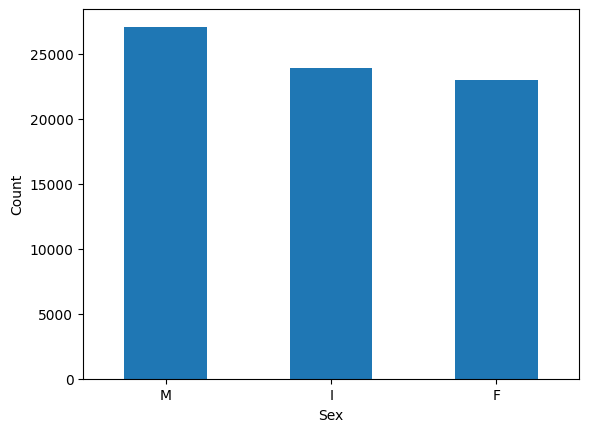

In [8]:
train['Sex'].value_counts().plot(kind='bar', rot=0)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

### Pie Charts

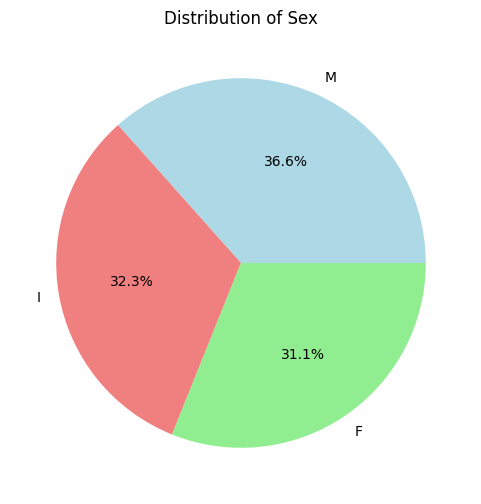

In [9]:
# Count the frequency of each unique value in the 'Sex' column
sex_counts = train['Sex'].value_counts()

plt.figure(figsize=(6, 6))  # Adjust the figure size if needed
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Sex')
plt.show()

### One Hot Encoding

In [10]:
train = pd.get_dummies(train, columns=['Sex'], prefix=['Sex'])
test = pd.get_dummies(test, columns=['Sex'], prefix=['Sex'])
sex_columns = ['Sex_F', 'Sex_I', 'Sex_M']
for column in sex_columns:
    train[column] = train[column].astype(int)
    test[column] = test[column].astype(int)

In [11]:
train.head()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,0,1,0
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,0,1,0
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,0,0,1
3,3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,1,0,0
4,4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,0,1,0


In [12]:
test.head()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M
0,74051,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552,0,1,0
1,74052,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930,0,1,0
2,74053,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415,1,0,0
3,74054,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676,1,0,0
4,74055,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066,0,1,0


## Feature Engineering 

I got this from [here](https://www.kaggle.com/competitions/playground-series-s3e16/discussion/415721)

### Ratio Features (help to capture relative size differences between different components):

- Viscera Ratio = Viscera Weight / Total Weight
- Shell Ratio = Shell Weight / Total Weight
- Shell-to-Body Ratio = Shell Weight / (Total Weight + Shell Weight)
- Meat Yield = Shucked Weight / (Total Weight + Shell Weight)
- Length-to-Diameter Ratio = Length / Diameter
- Weight-to-VisceraWeight Ratio = Total Weight / Viscera Weight
- Weight-to-ShellWeight Ratio = Total Weight / Shell Weight
- Weight-to-ShuckedWeight Ratio = Total Weight / Shucked Weight

### Geometric Features (help to capture physical properties of the crab):

- Surface Area = 2 * (Length * Diameter + Length * Height + Diameter * Height)
- Volume = Length * Diameter * Height
- Density = Total Weight / Volume
- Pseudo BMI = Total Weight / (Height ^ 2)

### Polynomial Features (help to capture any non-linear relationship between predictors):

- Length^2 = Length ^ 2
- Diameter^2 = Diameter ^ 2

### Logarithmic Transformations (help to reduce skewness and manage extreme values):

- Log Weight = log(Total Weight + 1)

### Binned Features (simplify the relationship with the target variable):

- Length Bins = Binned version of Length (e.g., quartiles)

### Derived Weight Features (capture more nuanced information about weight distribution):

- Weight_wo_Viscera = Shucked Weight - Viscera Weight
- Body Condition Index = sqrt(Length * Total Weight * Shucked Weight)

In [13]:
def bmi(w,h):
    return w/(h**2)

In [14]:
def surface_area(l,d,h):
    return 2*(l*d+d*h+l*h)

In [15]:
train['Volume'] = train['Length']*train['Diameter']*train['Height']
train['Density']= train['Weight']/train['Volume']
train['BMI'] = bmi(train['Weight'],train['Height'])
train['Surface Area'] = surface_area(train['Length'],train['Diameter'],train['Height'])
train['DL Ratio'] = train['Diameter']/train['Length']
train['SwW Ratio'] = train['Shell Weight']/train['Weight']

test['Volume'] = test['Length']*test['Diameter']*test['Height']
test['Density']= test['Weight']/test['Volume']
test['BMI'] = bmi(test['Weight'],test['Height'])
test['Surface Area'] = surface_area(test['Length'],test['Diameter'],test['Height'])
test['DL Ratio'] = test['Diameter']/test['Length']
test['SwW Ratio'] = test['Shell Weight']/test['Weight']

## Data Profiling (Post Feature Engineering)



In [16]:
#removing outliers

columns_to_check = train.select_dtypes(include=['int64', 'float64']).drop(columns=['id'])

# Function to remove outliers using the IQR method
def remove_outliers_iqr(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Remove outliers from the specified columns
train = remove_outliers_iqr(train, columns_to_check)

# Display the shape of the DataFrame before and after removing outliers
print("Original DataFrame shape:", train.shape)
print("DataFrame shape after removing outliers:", train.shape)

Original DataFrame shape: (62010, 18)
DataFrame shape after removing outliers: (62010, 18)


In [17]:
#looking at dataframe columns
print(train.columns)
print()
#looking at info 
train.info()
print()
train.head()
print()
train.describe()

Index(['id', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age', 'Sex_F', 'Sex_I', 'Sex_M',
       'Volume', 'Density', 'BMI', 'Surface Area', 'DL Ratio', 'SwW Ratio'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Index: 62010 entries, 0 to 74050
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              62010 non-null  int64  
 1   Length          62010 non-null  float64
 2   Diameter        62010 non-null  float64
 3   Height          62010 non-null  float64
 4   Weight          62010 non-null  float64
 5   Shucked Weight  62010 non-null  float64
 6   Viscera Weight  62010 non-null  float64
 7   Shell Weight    62010 non-null  float64
 8   Age             62010 non-null  int64  
 9   Sex_F           62010 non-null  int64  
 10  Sex_I           62010 non-null  int64  
 11  Sex_M           62010 non-null  int64  
 12  Volume       

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M,Volume,Density,BMI,Surface Area,DL Ratio,SwW Ratio
count,62010.000000,62010.000000,62010.000000,62010.000000,62010.000000,62010.000000,62010.000000,62010.000000,62010.000000,62010.000000,62010.000000,62010.000000,62010.000000,62010.000000,62010.000000,62010.000000,62010.000000,62010.000000
mean,37008.048089,1.334481,1.037494,0.351244,23.331511,10.201889,5.073098,6.641879,9.602806,0.311063,0.317497,0.371440,0.540876,43.892230,174.027453,4.603328,0.775800,0.289521
std,21395.872745,0.249519,0.205236,0.079357,11.475659,5.197850,2.571473,3.169718,2.226890,0.462932,0.465506,0.483194,0.274694,4.475263,37.333508,1.643122,0.023789,0.031800
min,0.000000,0.587500,0.462500,0.137500,1.573397,0.552815,0.226796,0.396893,4.000000,0.000000,0.000000,0.000000,0.038156,31.313300,69.349177,0.847188,0.711111,0.200753
25%,18461.250000,1.175000,0.900000,0.300000,14.047177,6.024269,2.990872,4.110678,8.000000,0.000000,0.000000,0.000000,0.322412,40.784352,148.839564,3.381797,0.760000,0.267289
50%,36995.500000,1.387500,1.075000,0.362500,23.693095,9.993199,4.975337,6.803880,9.000000,0.000000,0.000000,0.000000,0.545449,43.637594,175.001758,4.803125,0.776699,0.287293
75%,55524.750000,1.525000,1.200000,0.412500,31.808139,13.990478,6.931453,8.930093,11.000000,1.000000,1.000000,1.000000,0.743273,46.758655,199.463159,5.887187,0.791667,0.310559
max,74050.000000,1.925000,1.500000,0.575000,59.618998,26.124064,12.998246,16.442710,15.000000,1.000000,1.000000,1.000000,1.384070,56.585995,277.523153,8.848750,0.840426,0.378830


## Exploratory Data Analysis

#### Single Variable Plots
- Histograms
- Box Plots
- Bar charts
- Pie Charts

#### Relationships & Multi-variable plots
- Scatterplots / Heat Maps
- Correlation Matrices

The following haven't been explored in this notebook.
- Pivot Tables
- Bar Charts
- Line Charts : How variables change over time

## Single Variable Plots

### Histograms

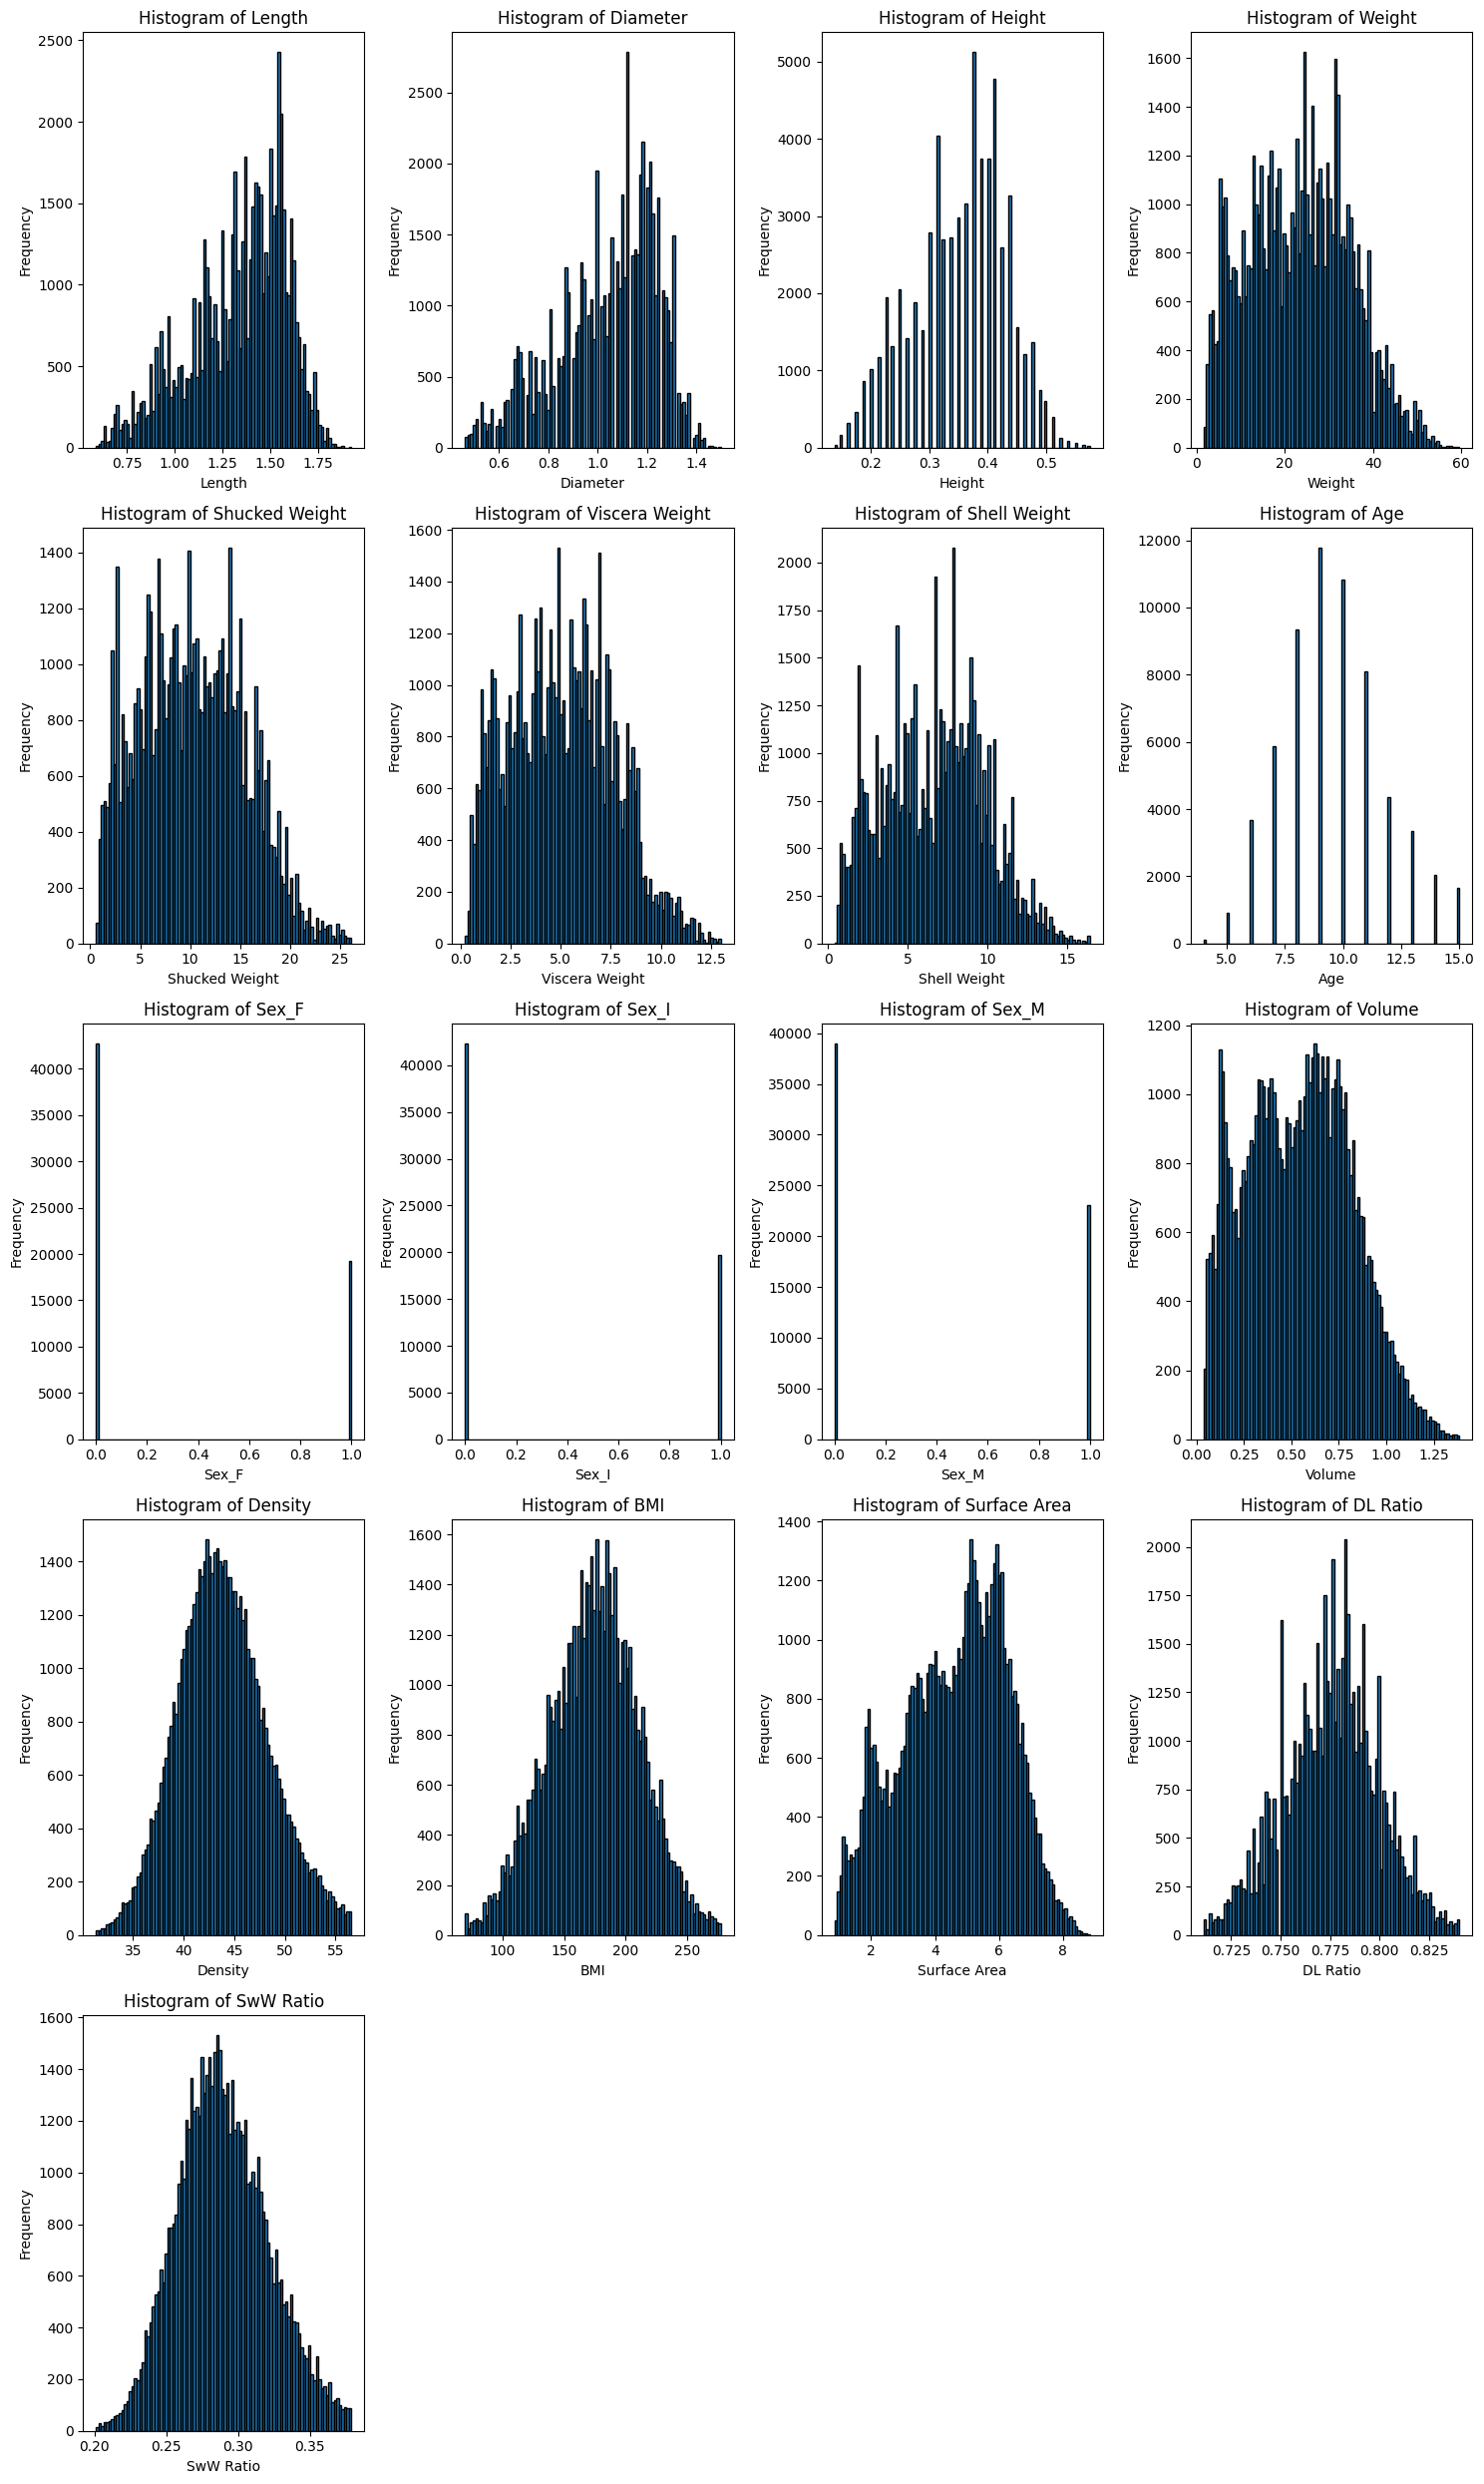

In [18]:
# Assuming your DataFrame is named 'train'
df_hist = train.copy()  # Renamed the DataFrame to df_hist

# Remove the 'Sex' column from the DataFrame
df_hist.drop(columns=['id'], inplace=True)

# Calculate the number of rows and columns for subplots
num_cols = len(df_hist.columns)
num_rows = math.ceil(num_cols / 4)  # Adjust the number of columns per row as needed

# Plot histograms for each column
plt.figure(figsize=(15, 5 * num_rows))  # Adjust the figure size if needed

for i, column in enumerate(df_hist.columns, start=1):
    plt.subplot(num_rows, 4, i)
    df_hist[column].plot(kind='hist', edgecolor='black', bins=100)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Box Plots

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/opt/conda/lib/python3.10/site-pack

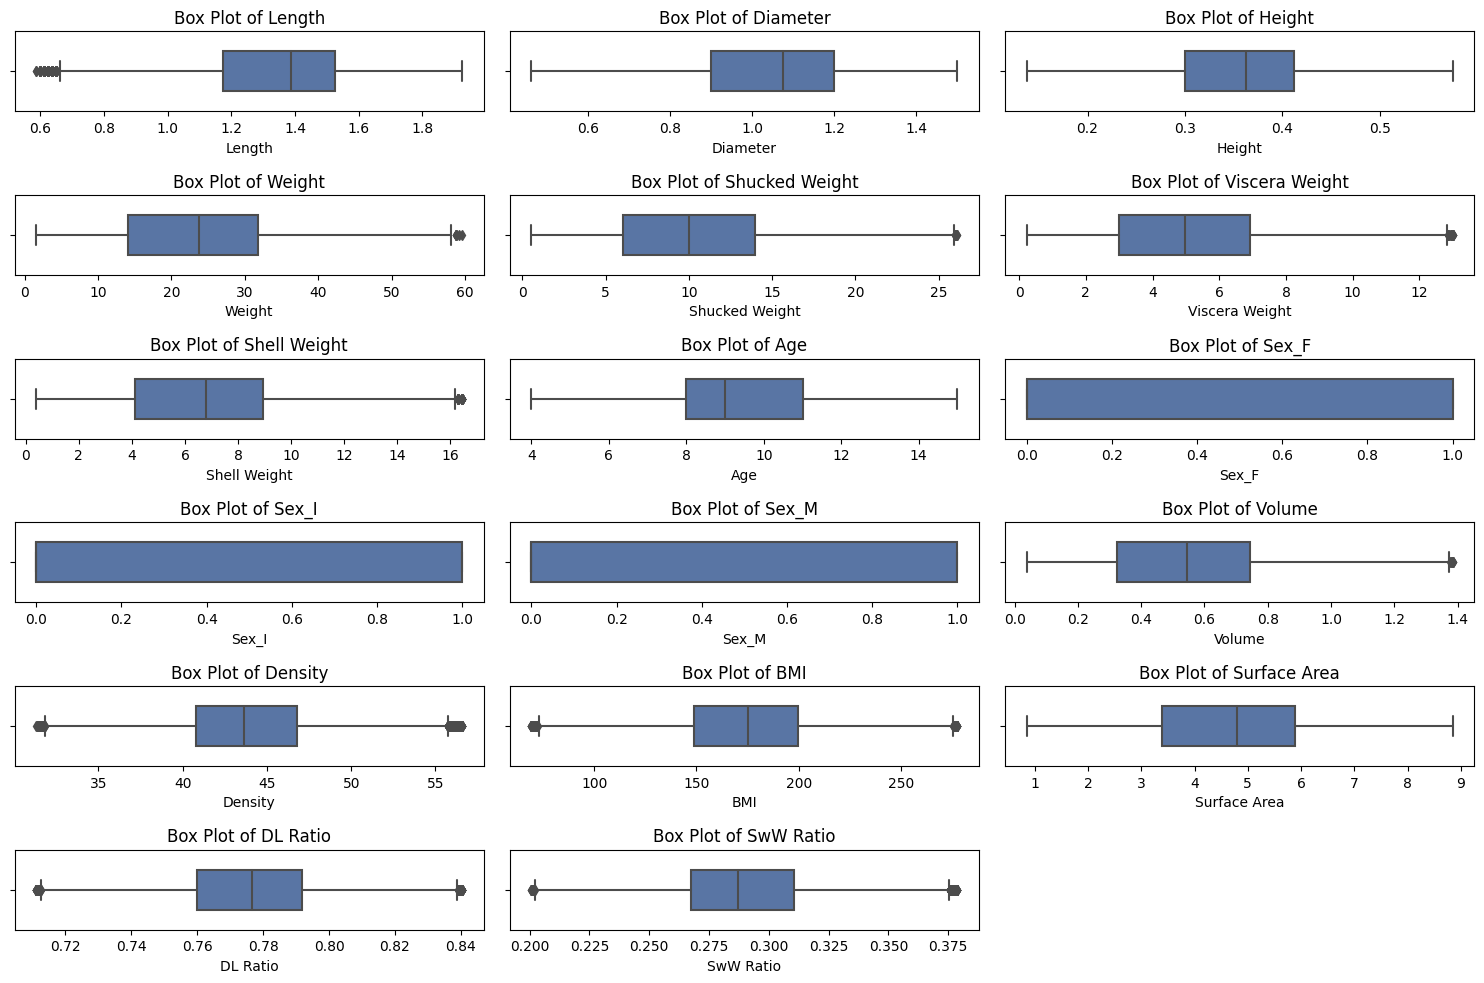

In [19]:
numeric_columns = train.select_dtypes(include=['int64', 'float64']).drop(columns=['id'])

# Calculate the number of rows and columns for subplots dynamically
n_cols = 3  # Set the number of columns per row as needed
n_rows = (len(numeric_columns.columns) + n_cols - 1) // n_cols  # Calculate the number of rows

# Create subplots for box plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
sns.set(style="whitegrid")  # Set the style of the plot

for i, column in enumerate(numeric_columns.columns):
    ax = axes[i // n_cols, i % n_cols]
    sns.boxplot(x=column, data=train, orient="v", width=0.5, ax=ax)
    ax.set_title(f'Box Plot of {column}')

# Remove any empty subplots
for i in range(len(numeric_columns.columns), n_cols * n_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

## Multivariable Plots

### Heat map / Correlation matrix

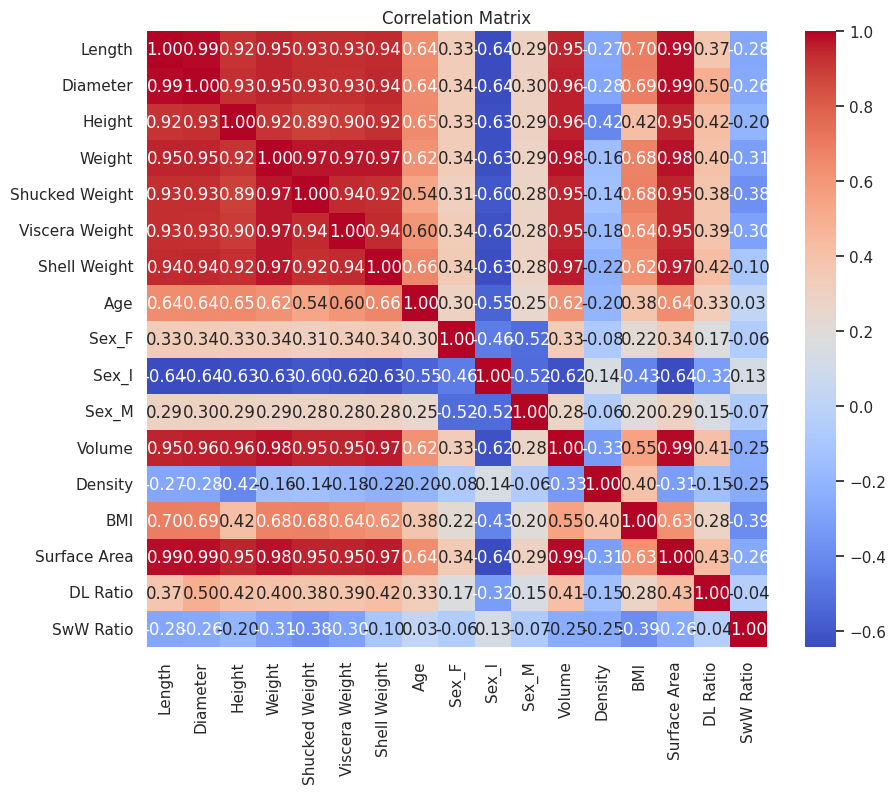

In [20]:
df = train.copy() 
df = df.drop(columns=['id'])

# Create a correlation matrix
correlation_matrix = df.corr()
# Create a heatmap of the correlation matrix with masked values
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

From above we can see that the features most affecting age are:

- shell weight
- height
- diameter
- length
- surface area
- weight
- sex i indicates age as immature = less age

diameter and length have a 0.99 correlation factor so lets only consider one i.e diameter.

- shell weight
- height
- surface area
- sex i

shell weight gives a lower error value than weight.

### Scatter plots

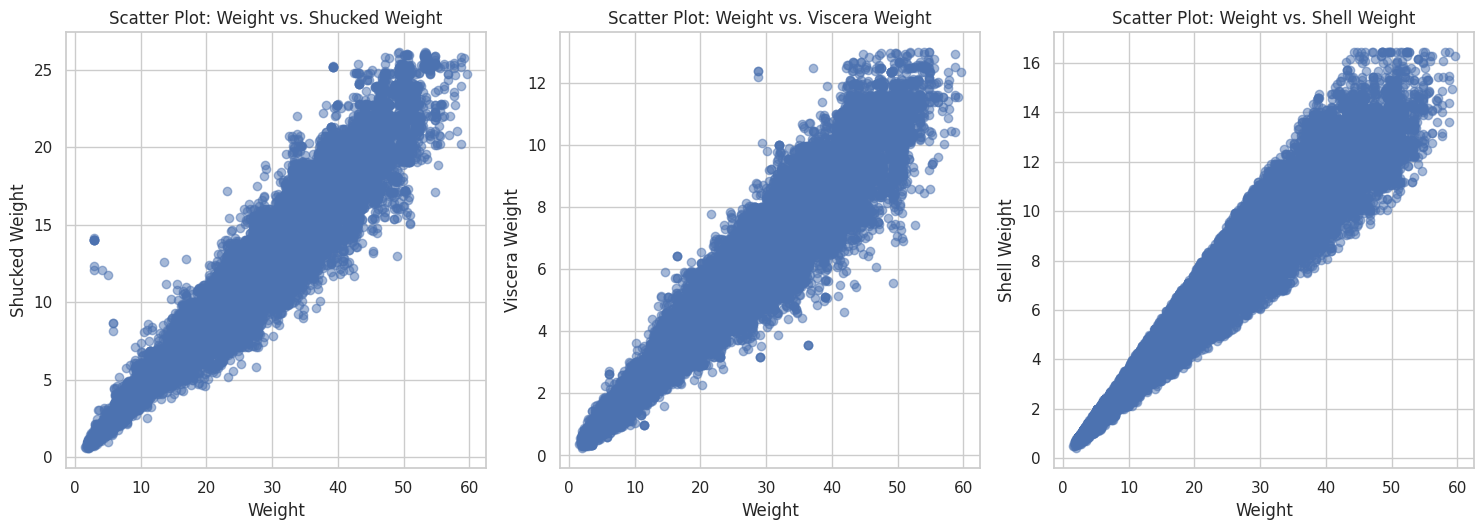

In [21]:
df_weight = train.copy()  # Renamed the DataFrame to df_weight

# List of weight-related columns (excluding 'Weight')
weight_columns = ['Shucked Weight', 'Viscera Weight', 'Shell Weight']

# Create scatter plots for 'Weight' vs. each weight-related column
plt.figure(figsize=(15, 10))  # Adjust the figure size if needed

for column in weight_columns:
    plt.subplot(2, 3, weight_columns.index(column) + 1)
    plt.scatter(df_weight['Weight'], df_weight[column], alpha=0.5)
    plt.title(f'Scatter Plot: Weight vs. {column}')
    plt.xlabel('Weight')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

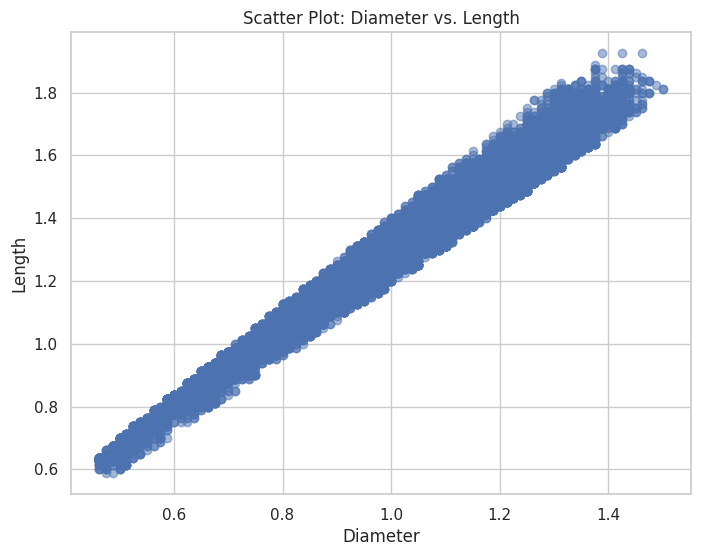

In [22]:
# Create a scatter plot of 'Diameter' vs. 'Length'
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
plt.scatter(train['Diameter'], train['Length'], alpha=0.5)
plt.title('Scatter Plot: Diameter vs. Length')
plt.xlabel('Diameter')
plt.ylabel('Length')
plt.grid(True)
plt.show()

## Modelling

In [23]:
selected_features = ['Shell Weight', 'Height', 'Surface Area','Sex_I']

train_selected = df[selected_features]

X = train_selected  # Features
y = df['Age']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Linear Regression Model

In [24]:
regressor1 = LinearRegression()

regressor1.fit(X_train, y_train)

y_pred = regressor1.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print(f"Linear Regression Mean Absolute Error (MAE): {mae}")

Linear Regression Mean Absolute Error (MAE): 1.206261348025037


## Decision Tree Model

In [25]:
regressor2 = DecisionTreeRegressor()

# Fit the model to the training data
regressor2.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor2.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print(f"Decision Tree Regressor Mean Absolute Error (MAE): {mae}")

Decision Tree Regressor Mean Absolute Error (MAE): 1.5597741032734822


## Random Forest Model

In [26]:
regressor3 = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model to the training data
regressor3.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor3.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print(f"Random Forest Regressor Mean Absolute Error (MAE): {mae}")

Random Forest Regressor Mean Absolute Error (MAE): 1.287234764661081


### Submission
Submitting using random forest model

In [27]:
X_test = test[selected_features]
filename = './output/predicted-age'
y_final = regressor3.predict(X_test)
submission = pd.DataFrame({'id': test.id, 'Age': y_final},columns = ['id', 'Age'])
submission.to_csv('submission.csv', index = False)

In [28]:
submission

,id,Age
0,74051,6.580000
1,74052,7.407619
2,74053,9.125000
3,74054,9.983333
4,74055,7.580000
...,...,...
49363,123414,10.450000
49364,123415,8.430000
49365,123416,11.232500
49366,123417,12.400000
